Author : Vazgen Tadevosyan<br>
Class  : STAT.614<br>
HW1

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


1. An important characteristic in a chemical process is viscosity. The viscosity
measurements for the last 100 batches are recorded in a file called viscosity.txt. Use this
data to answer the following questions.

In [43]:
viscosity = pd.read_csv('viscosity.txt', delimiter = "\t",index_col=0)
viscosity.head()

,Viscosity
Batch,
1,84.63
2,86.84
3,84.54
4,85.56
5,85.40


In [46]:
mean=viscosity['Viscosity'].mean()
median=viscosity['Viscosity'].median()
mode=viscosity['Viscosity'].mode().values[0]

a. Provide a graphical summary of viscosity and comment on the shape of the
distribution.


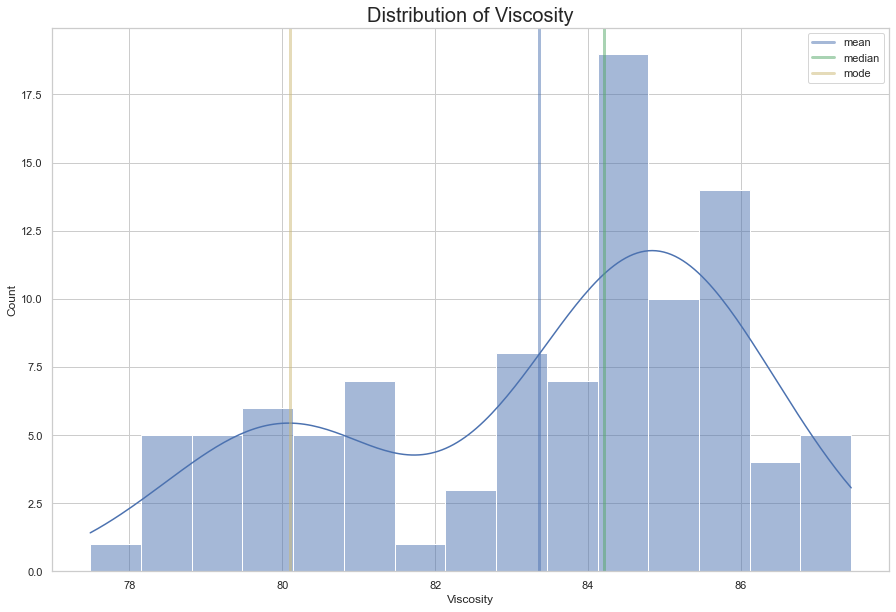

In [60]:
plt.figure(figsize=(15,10))
sns.histplot(viscosity, x ="Viscosity", bins=15, kde=True)
plt.axvline(x=mean, linewidth=3, color='b', label="mean", alpha=0.5)
plt.axvline(x=median, linewidth=3, color='g', label="median", alpha=0.5)
plt.axvline(x=mode, linewidth=3, color='y', label="mode", alpha=0.5)
plt.legend()
plt.title("Distribution of Viscosity", fontdict={'fontsize': 20})
plt.show()

### The distribution of Viscocity is left skewed as you see mean is less than median

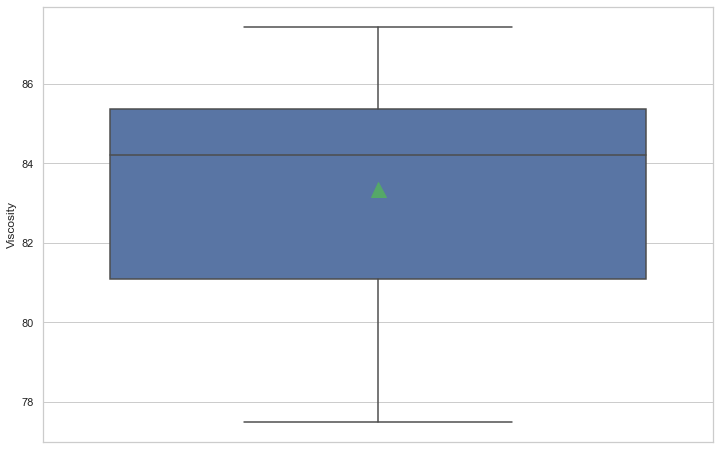

In [53]:
plt.figure(figsize=(12,8))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(y=viscosity["Viscosity"],showmeans=True,meanprops={"markersize":"15"})

<font size="3"> There is no outliers in the plot</font>

b. Provide a numerical summary of viscosity. Which measures of center and spread
would you use and why?


In [111]:
viscosity.describe()

,Viscosity
count,100.000000
mean,83.364300
std,2.535917
min,77.490000
25%,81.085000
50%,84.210000
75%,85.377500
max,87.440000


### For measuring center it is necessary to use mean and median. Variance and Standard deviations are important for measuring spread of the data. 

c. Is this process stable over time? Explain. Provide a plot that helps explain your
answer.

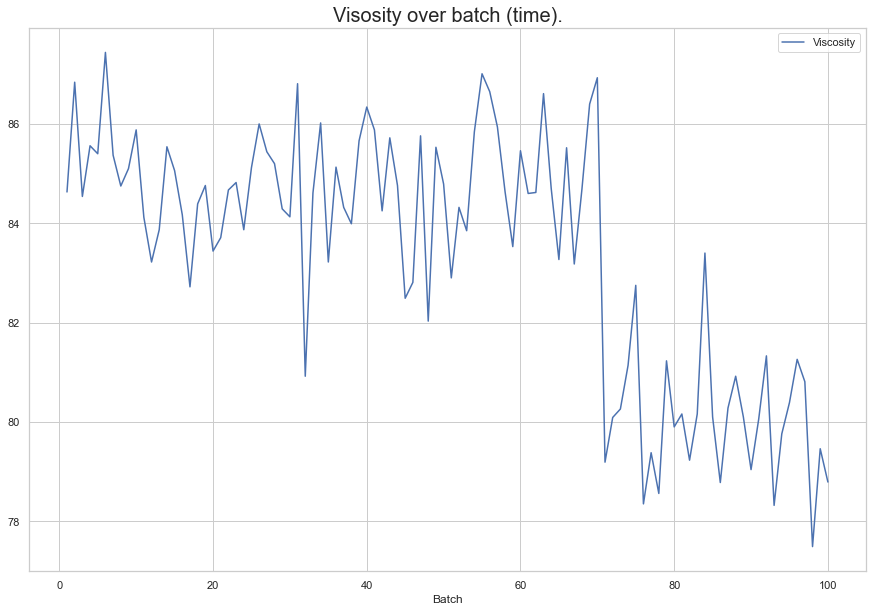

In [109]:
viscosity.plot(figsize=(15,10))
plt.title("Visosity over batch (time).",fontdict=dict(size=20))
plt.show()

### It is seen that viscosity does not have constant variance over batch (time).

2. Researchers studying consumer preferences collected data from a survey. The
respondents replied with their relationship status and frequency of teeth cleaning. The
data is in toothpaste.txt.

In [77]:
toothpaste = pd.read_csv('toothpaste.txt', delimiter = "\t",index_col=0)
toothpaste.head()

,Frequency of Teeth Cleaning,Single Status
Response ID,,
19,Every six months,Not Single
22,Less than every other year,Not Single
23,Less than every other year,Not Single
26,Every other year,Not Single
28,Every year,Not Single


a.Provide a graphical summary of the frequency of teeth cleaning variable, include
some comments on what you see.

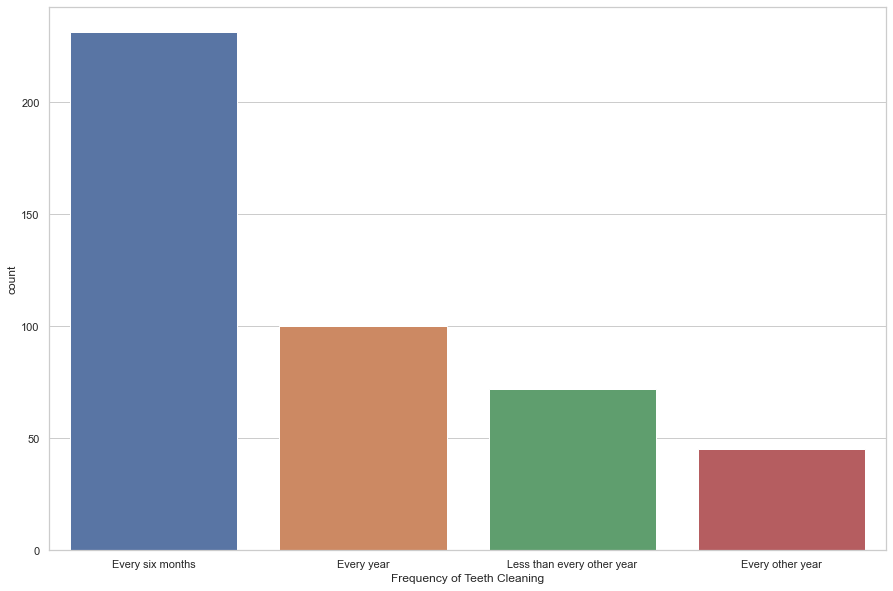

In [91]:
plt.figure(figsize=(15,10))
ax = sns.countplot( x ="Frequency of Teeth Cleaning", data=toothpaste, 
                   order=toothpaste["Frequency of Teeth Cleaning"].value_counts().index)
plt.show()

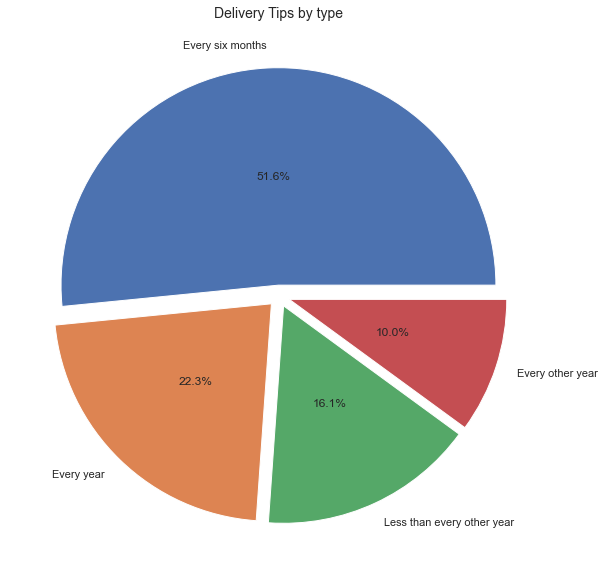

In [180]:
#Using matplotlib
plt.figure(figsize=(15,10))
data = toothpaste["Frequency of Teeth Cleaning"].value_counts()
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)
plt.title("Delivery Tips by type", fontsize=14)
plt.show()

#### People who clean their teeth every six months are the biggest portion of our sample, quite contrary people who tend to do that in every other year are the smallest one. So there are more poeple (mora than half of the people) follow their health and hygien.

b. For both variables, provide a table with the counts of each category and a table with
the percentages of each category.


In [158]:
print("Frequency of Teeth Cleaning Distribution")
print(toothpaste["Frequency of Teeth Cleaning"].value_counts())
print("\n")
print("*"*100)
print("\n")
print("Distribution of Status")
print(toothpaste["Single Status"].value_counts())
print("\n")
print("*"*100)
print("\n")
print((toothpaste["Frequency of Teeth Cleaning"].value_counts(normalize=True)*100).apply(lambda x: str(round(x,2))+"%"))
print("\n")
print("*"*100)
print("\n")
print((toothpaste["Single Status"].value_counts(normalize=True)*100).apply(lambda x: str(round(x,2))+"%"))

Frequency of Teeth Cleaning Distribution
Every six months              231
Every year                    100
Less than every other year     72
Every other year               45
Name: Frequency of Teeth Cleaning, dtype: int64


****************************************************************************************************


Distribution of Status
Not Single    271
Single        177
Name: Single Status, dtype: int64


****************************************************************************************************


Every six months              51.56%
Every year                    22.32%
Less than every other year    16.07%
Every other year              10.04%
Name: Frequency of Teeth Cleaning, dtype: object


****************************************************************************************************


Not Single    60.49%
Single        39.51%
Name: Single Status, dtype: object


c. Do you think there is a relationship between relationship status and how frequently
someone gets their teeth cleaned?

In [168]:
pd.crosstab(toothpaste['Frequency of Teeth Cleaning'],toothpaste['Single Status'])

Single Status,Not Single,Single
Frequency of Teeth Cleaning,,
Every other year,21,24
Every six months,151,80
Every year,56,44
Less than every other year,43,29


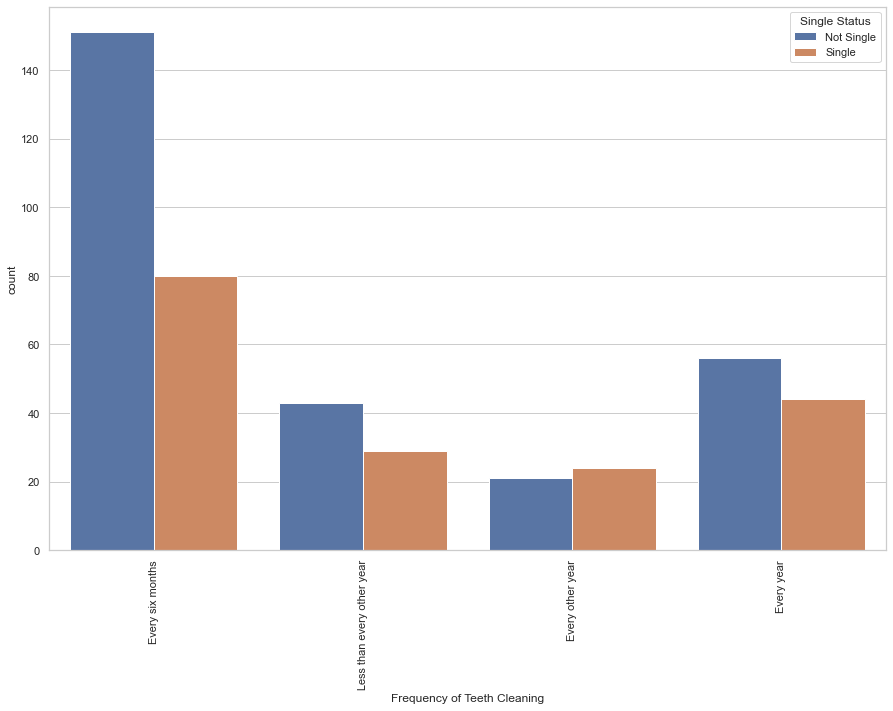

In [181]:
plt.figure(figsize=(15,10))
ax = sns.countplot(x="Frequency of Teeth Cleaning", hue="Single Status", data=toothpaste)
plt.xticks(rotation=90)
plt.show()

### Even though one can assume based on plot that there is a relationship as in 3 frequency groups out of 4 people who are single tend to wash their teeth less than people who are not single.

3. In brainsize.txt, there are IQ scores and MRI data for 38 subjects. Is there a linear
relationship between brain size (MRI count) and IQ scores (FSIQ)? Provide a plot that
helps you answer this question.

In [188]:
brainsize = pd.read_csv('brainsize.txt', delimiter="\t")
brainsize.head()

,FSIQ,MRICount
0,133,816932
1,139,1038437
2,133,965353
3,137,951545
4,99,928799


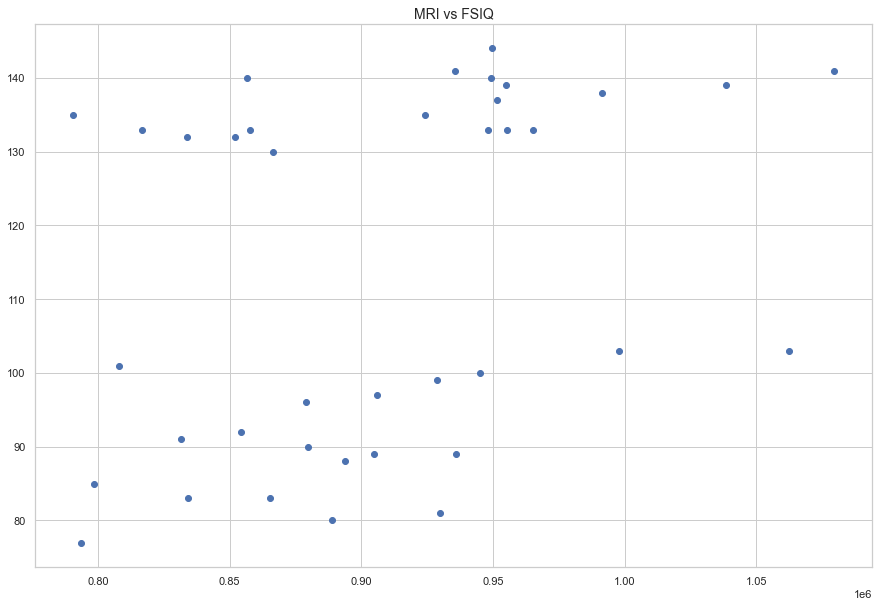

In [193]:
plt.figure(figsize=(15,10))
plt.scatter(x="MRICount", y="FSIQ", data=brainsize)
plt.title("MRI vs FSIQ", fontsize=14)
plt.show()

### There is no linear relationship between these two variables.